In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("solarpowergeneration.csv")

In [3]:
df

distance-to-solar-noon  temperature  wind-direction  wind-speed  \
0                   0.859897           69              28         7.5   
1                   0.628535           69              28         7.5   
2                   0.397172           69              28         7.5   
3                   0.165810           69              28         7.5   
4                   0.065553           69              28         7.5   
...                      ...          ...             ...         ...   
2915                0.166453           63              27        13.9   
2916                0.064020           63              27        13.9   
2917                0.294494           63              27        13.9   
2918                0.524968           63              27        13.9   
2919                0.755442           63              27        13.9   

      sky-cover  visibility  humidity  average-wind-speed-(period)  \
0             0        10.0        75                          8.0   
1             0        10.0        77                          5.0   
2             0        10.0        70                          0.0   
3             0        10.0        33                          0.0   
4             0        10.0        21                          3.0   
...         ...         ...       ...                          ...   
2915          4        10.0        75                         10.0   
2916          1        10.0        66                         15.0   
2917          2        10.0        68                         21.0   
2918          2        10.0        81                         17.0   
2919          1        10.0        81                         11.0   

      average-pressure-(period)  power-generated  
0                         29.82                0  
1                         29.85                0  
2                         29.89             5418  
3                         29.91            25477  
4                         29.89            30069  
...                         ...              ...  
2915                      29.93             6995  
2916                      29.91            29490  
2917                      29.88            17257  
2918                      29.87              677  
2919                      29.90                0  

[2920 rows x 10 columns]

# Understanding Dataset (EDA)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   distance-to-solar-noon       2920 non-null   float64
 1   temperature                  2920 non-null   int64  
 2   wind-direction               2920 non-null   int64  
 3   wind-speed                   2920 non-null   float64
 4   sky-cover                    2920 non-null   int64  
 5   visibility                   2920 non-null   float64
 6   humidity                     2920 non-null   int64  
 7   average-wind-speed-(period)  2919 non-null   float64
 8   average-pressure-(period)    2920 non-null   float64
 9   power-generated              2920 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 228.3 KB


In [5]:
df.describe()

distance-to-solar-noon  temperature  wind-direction   wind-speed  \
count             2920.000000  2920.000000     2920.000000  2920.000000   
mean                 0.503294    58.468493       24.953425    10.096986   
std                  0.298024     6.841200        6.915178     4.838185   
min                  0.050401    42.000000        1.000000     1.100000   
25%                  0.243714    53.000000       25.000000     6.600000   
50%                  0.478957    59.000000       27.000000    10.000000   
75%                  0.739528    63.000000       29.000000    13.100000   
max                  1.141361    78.000000       36.000000    26.600000   

         sky-cover   visibility     humidity  average-wind-speed-(period)  \
count  2920.000000  2920.000000  2920.000000                  2919.000000   
mean      1.987671     9.557705    73.513699                    10.129154   
std       1.411978     1.383884    15.077139                     7.261547   
min       0.000000     0.000000    14.000000                     0.000000   
25%       1.000000    10.000000    65.000000                     5.000000   
50%       2.000000    10.000000    77.000000                     9.000000   
75%       3.000000    10.000000    84.000000                    15.000000   
max       4.000000    10.000000   100.000000                    40.000000   

       average-pressure-(period)  power-generated  
count                2920.000000      2920.000000  
mean                   30.017760      6979.846233  
std                     0.142006     10312.336413  
min                    29.480000         0.000000  
25%                    29.920000         0.000000  
50%                    30.000000       404.000000  
75%                    30.110000     12723.500000  
max                    30.530000     36580.000000

In [6]:
df.nunique()

distance-to-solar-noon         2660
temperature                      37
wind-direction                   35
wind-speed                      159
sky-cover                         5
visibility                       17
humidity                         75
average-wind-speed-(period)      32
average-pressure-(period)        90
power-generated                1529
dtype: int64

In [7]:
df.isnull().sum()

distance-to-solar-noon         0
temperature                    0
wind-direction                 0
wind-speed                     0
sky-cover                      0
visibility                     0
humidity                       0
average-wind-speed-(period)    1
average-pressure-(period)      0
power-generated                0
dtype: int64

In [8]:
#Plotting missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap="RdBu")
plt.show()

In [9]:
#record of missing value
df[df['average-wind-speed-(period)'].isna()]

distance-to-solar-noon  temperature  wind-direction  wind-speed  \
714                0.406143           57              12         2.8   

     sky-cover  visibility  humidity  average-wind-speed-(period)  \
714          2         4.0        96                          NaN   

     average-pressure-(period)  power-generated  
714                      30.16              159

### 1. Treating missing value from "average-wind-speed-(period)" column

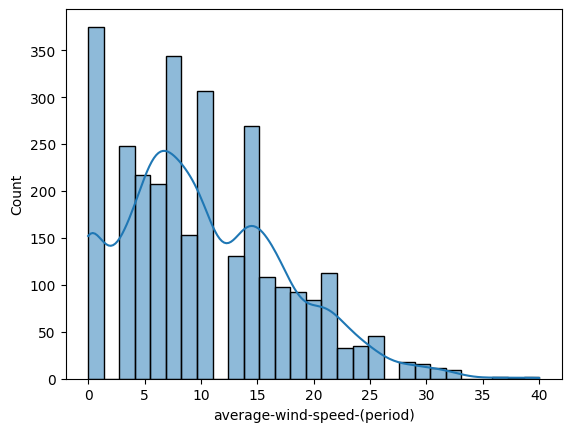

In [10]:
#checking distribution of 'average-wind-speed-(period)' column to treate missing value (whether to fill with mean or meadian)
sns.histplot(df['average-wind-speed-(period)'], kde=True)
plt.show()

In [11]:
df['average-wind-speed-(period)'].value_counts()

average-wind-speed-(period)
0.0     375
3.0     248
5.0     217
6.0     207
8.0     179
7.0     165
10.0    155
14.0    153
9.0     153
11.0    152
13.0    131
15.0    116
16.0    108
17.0     98
18.0     92
20.0     84
21.0     60
22.0     53
24.0     35
23.0     33
26.0     25
25.0     21
28.0     18
31.0     11
29.0     10
30.0      6
32.0      6
33.0      3
36.0      2
38.0      1
40.0      1
39.0      1
Name: count, dtype: int64

In [12]:
df['average-wind-speed-(period)'] = df['average-wind-speed-(period)'].fillna(df['average-wind-speed-(period)'].median())

In [13]:
df.isna().sum()

distance-to-solar-noon         0
temperature                    0
wind-direction                 0
wind-speed                     0
sky-cover                      0
visibility                     0
humidity                       0
average-wind-speed-(period)    0
average-pressure-(period)      0
power-generated                0
dtype: int64

In [14]:
#checking wheather duplicates record present in dataset
df[df.duplicated()]

Empty DataFrame
Columns: [distance-to-solar-noon, temperature, wind-direction, wind-speed, sky-cover, visibility, humidity, average-wind-speed-(period), average-pressure-(period), power-generated]
Index: []

In [15]:
# checking reltions between each features 
df.corr()

distance-to-solar-noon  temperature  \
distance-to-solar-noon                     1.000000    -0.145207   
temperature                               -0.145207     1.000000   
wind-direction                            -0.118010     0.342146   
wind-speed                                -0.145073     0.096267   
sky-cover                                 -0.015184    -0.230672   
visibility                                 0.065807     0.194110   
humidity                                   0.368964    -0.221463   
average-wind-speed-(period)               -0.214869     0.054556   
average-pressure-(period)                  0.082505    -0.435723   
power-generated                           -0.746681     0.132193   

                             wind-direction  wind-speed  sky-cover  \
distance-to-solar-noon            -0.118010   -0.145073  -0.015184   
temperature                        0.342146    0.096267  -0.230672   
wind-direction                     1.000000    0.341529  -0.137140   
wind-speed                         0.341529    1.000000   0.107793   
sky-cover                         -0.137140    0.107793   1.000000   
visibility                         0.203445    0.184778  -0.223523   
humidity                          -0.095917    0.004901   0.394576   
average-wind-speed-(period)        0.229805    0.673441   0.044300   
average-pressure-(period)         -0.272405   -0.379752  -0.091512   
power-generated                    0.146788    0.142641  -0.187236   

                             visibility  humidity  \
distance-to-solar-noon         0.065807  0.368964   
temperature                    0.194110 -0.221463   
wind-direction                 0.203445 -0.095917   
wind-speed                     0.184778  0.004901   
sky-cover                     -0.223523  0.394576   
visibility                     1.000000 -0.291320   
humidity                      -0.291320  1.000000   
average-wind-speed-(period)    0.143437 -0.218037   
average-pressure-(period)     -0.105345  0.018489   
power-generated                0.076536 -0.522545   

                             average-wind-speed-(period)  \
distance-to-solar-noon                         -0.214869   
temperature                                     0.054556   
wind-direction                                  0.229805   
wind-speed                                      0.673441   
sky-cover                                       0.044300   
visibility                                      0.143437   
humidity                                       -0.218037   
average-wind-speed-(period)                     1.000000   
average-pressure-(period)                      -0.293458   
power-generated                                 0.278188   

                             average-pressure-(period)  power-generated  
distance-to-solar-noon                        0.082505        -0.746681  
temperature                                  -0.435723         0.132193  
wind-direction                               -0.272405         0.146788  
wind-speed                                   -0.379752         0.142641  
sky-cover                                    -0.091512        -0.187236  
visibility                                   -0.105345         0.076536  
humidity                                      0.018489        -0.522545  
average-wind-speed-(period)                  -0.293458         0.278188  
average-pressure-(period)                     1.000000        -0.036771  
power-generated                              -0.036771         1.000000

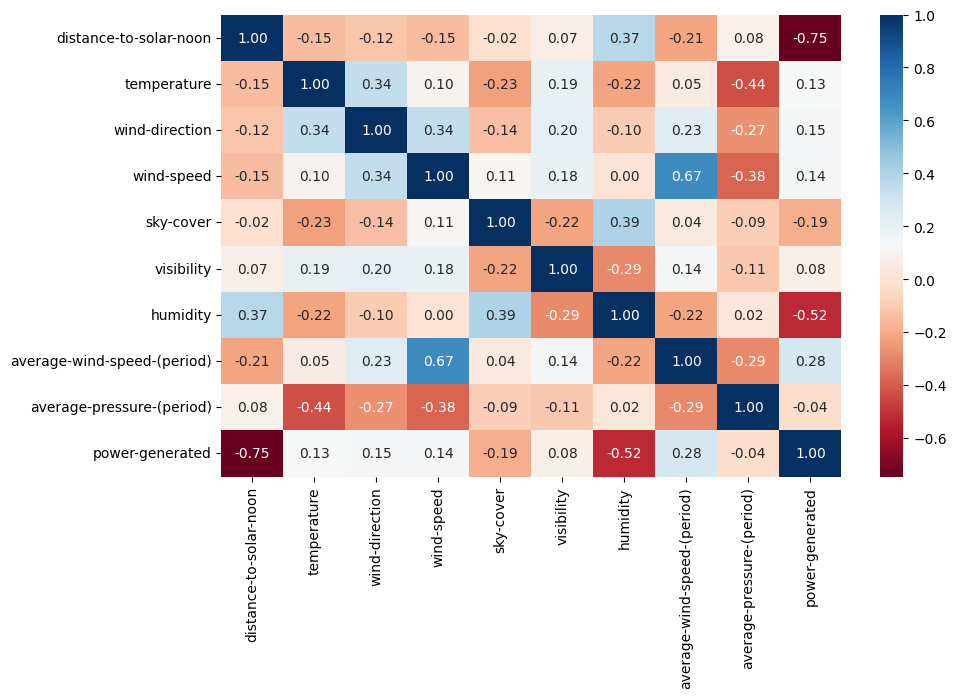

In [16]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="RdBu", fmt=".2f")
plt.show()

<Figure size 1000x600 with 0 Axes>

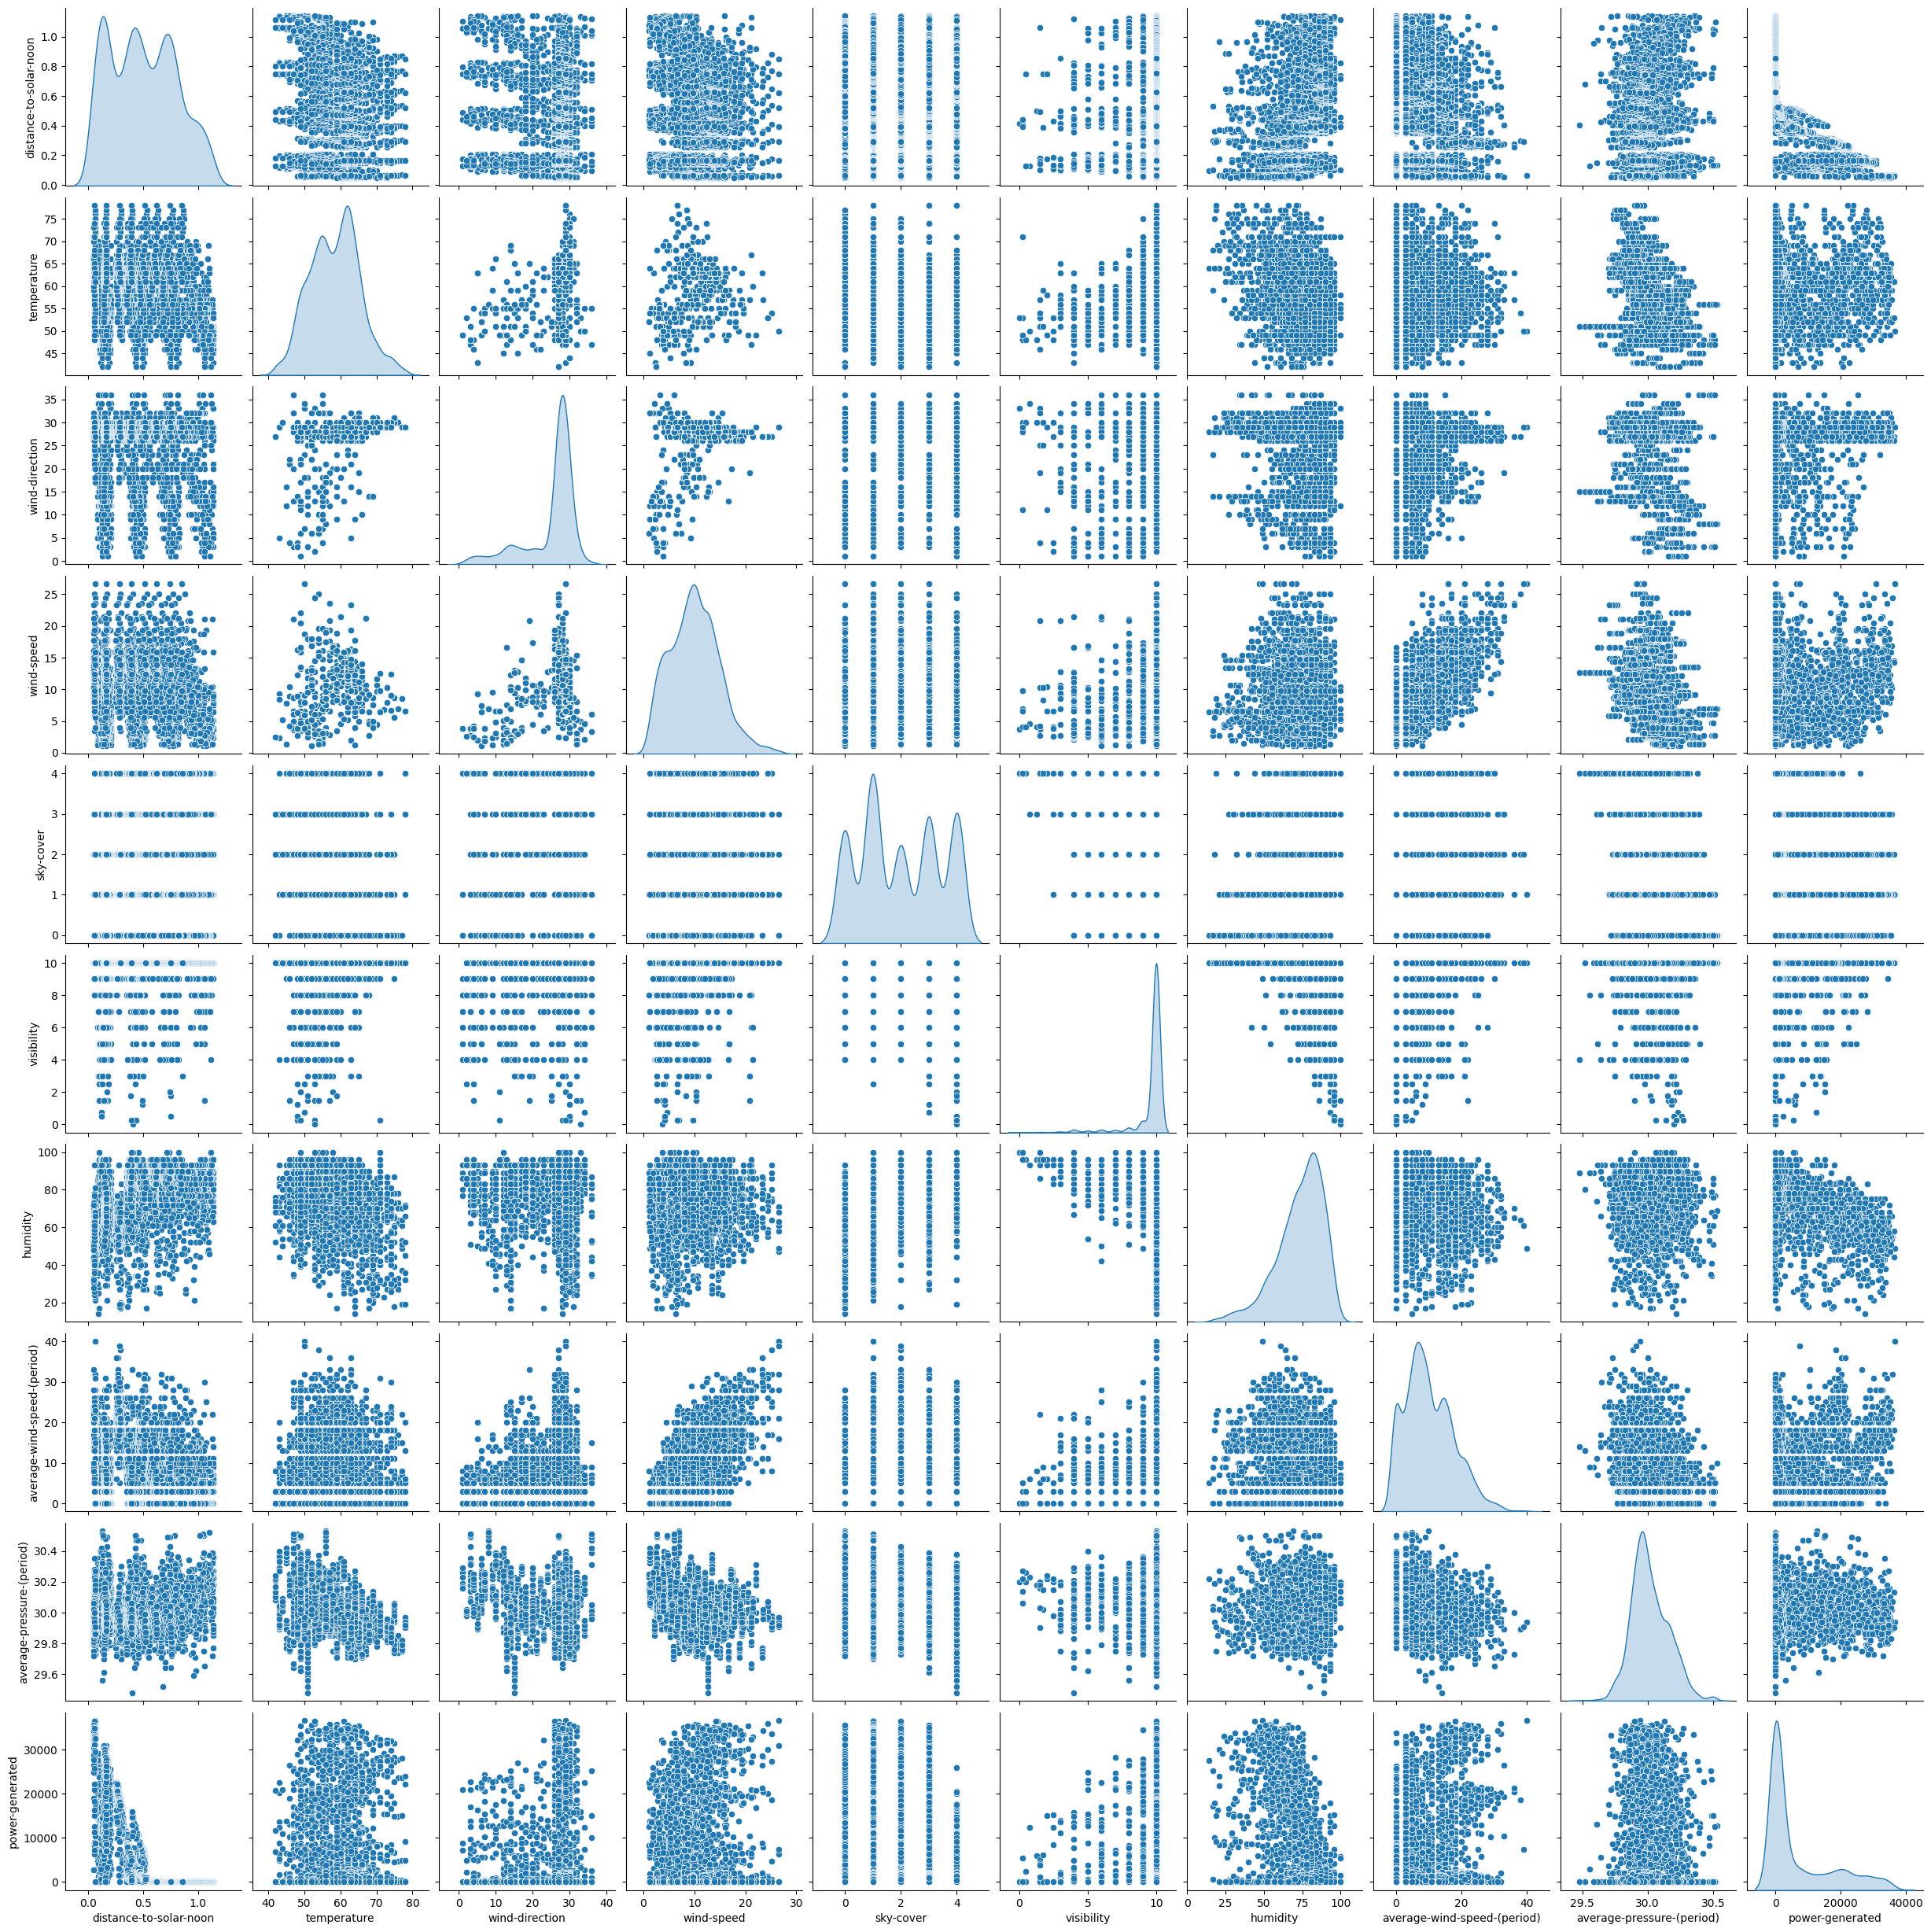

In [17]:
plt.figure(figsize=(10, 6))
sns.pairplot(df, diag_kind="kde")

In [18]:
df.head()

distance-to-solar-noon  temperature  wind-direction  wind-speed  sky-cover  \
0                0.859897           69              28         7.5          0   
1                0.628535           69              28         7.5          0   
2                0.397172           69              28         7.5          0   
3                0.165810           69              28         7.5          0   
4                0.065553           69              28         7.5          0   

   visibility  humidity  average-wind-speed-(period)  \
0        10.0        75                          8.0   
1        10.0        77                          5.0   
2        10.0        70                          0.0   
3        10.0        33                          0.0   
4        10.0        21                          3.0   

   average-pressure-(period)  power-generated  
0                      29.82                0  
1                      29.85                0  
2                      29.89             5418  
3                      29.91            25477  
4                      29.89            30069

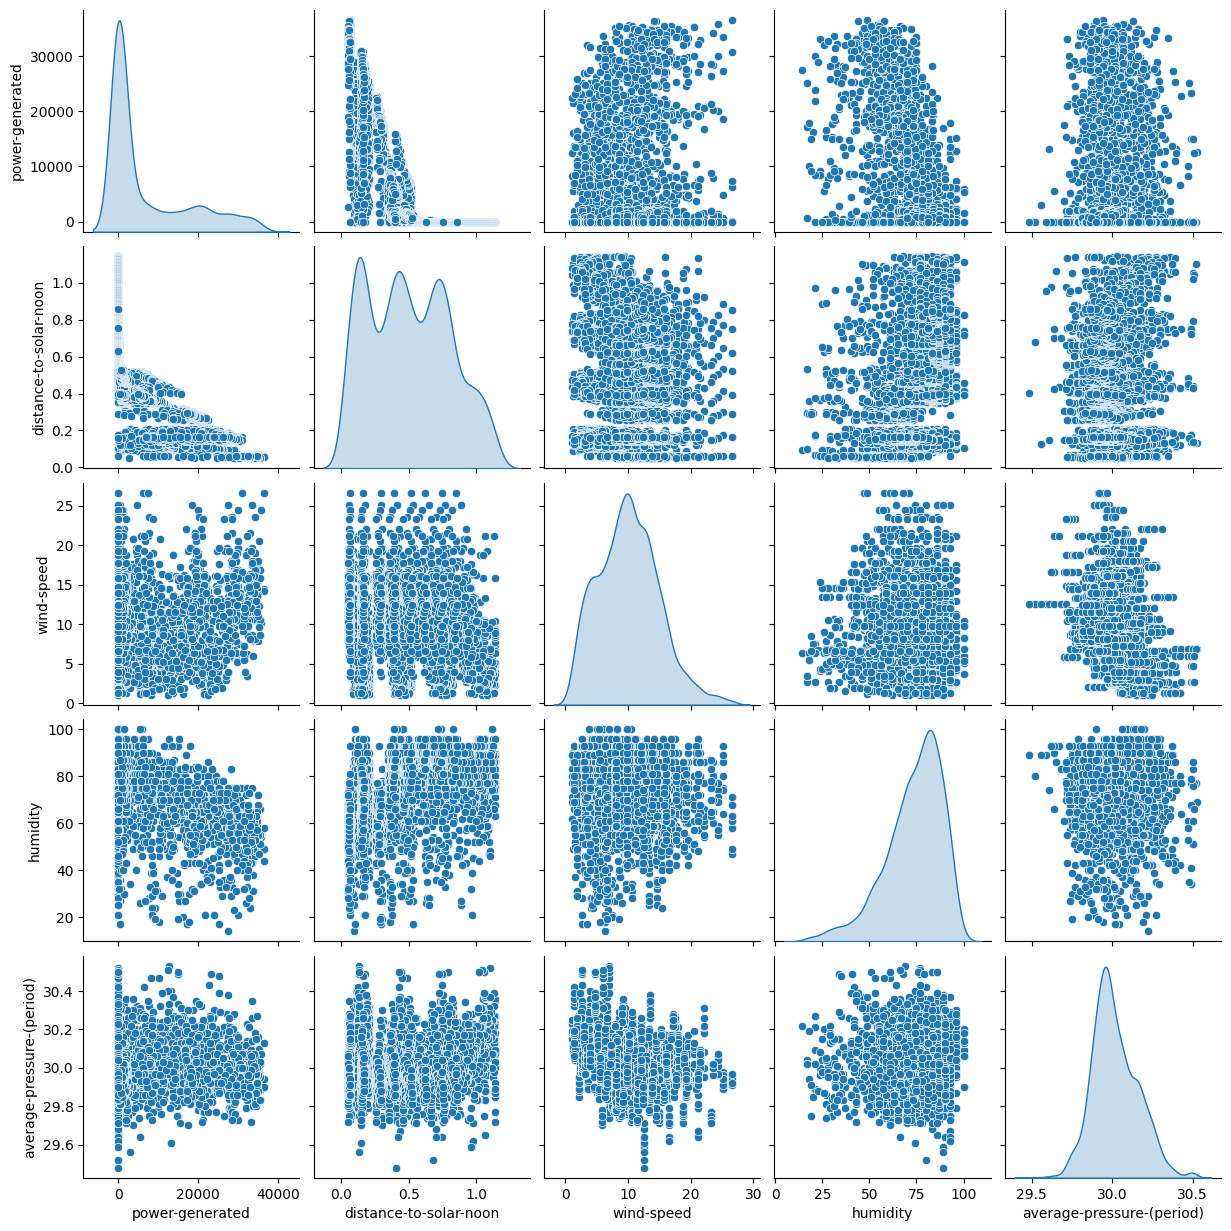

In [19]:
# Selecting some important features for pairplot to avoid clutter
important_features = ["power-generated", "distance-to-solar-noon", "wind-speed", "humidity", "average-pressure-(period)"]

sns.pairplot(df[important_features], diag_kind="kde")
plt.show()

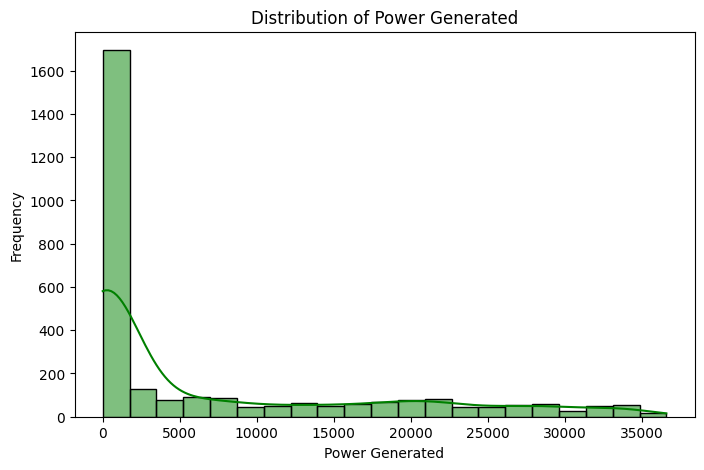

In [20]:
plt.figure(figsize=(8, 5))
sns.histplot(df["power-generated"], kde=True, color="green")
plt.title("Distribution of Power Generated")
plt.xlabel("Power Generated")
plt.ylabel("Frequency")
plt.show()

In [21]:
df.head()

distance-to-solar-noon  temperature  wind-direction  wind-speed  sky-cover  \
0                0.859897           69              28         7.5          0   
1                0.628535           69              28         7.5          0   
2                0.397172           69              28         7.5          0   
3                0.165810           69              28         7.5          0   
4                0.065553           69              28         7.5          0   

   visibility  humidity  average-wind-speed-(period)  \
0        10.0        75                          8.0   
1        10.0        77                          5.0   
2        10.0        70                          0.0   
3        10.0        33                          0.0   
4        10.0        21                          3.0   

   average-pressure-(period)  power-generated  
0                      29.82                0  
1                      29.85                0  
2                      29.89             5418  
3                      29.91            25477  
4                      29.89            30069

## Outlier detection 

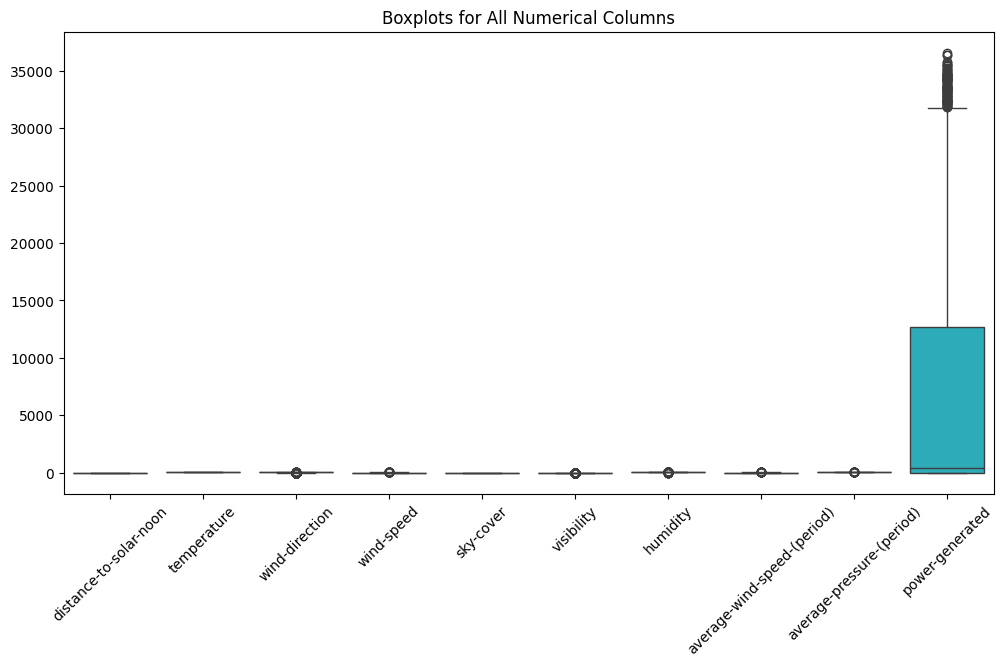

In [22]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.title('Boxplots for All Numerical Columns')
plt.xticks(rotation=45)
plt.show()

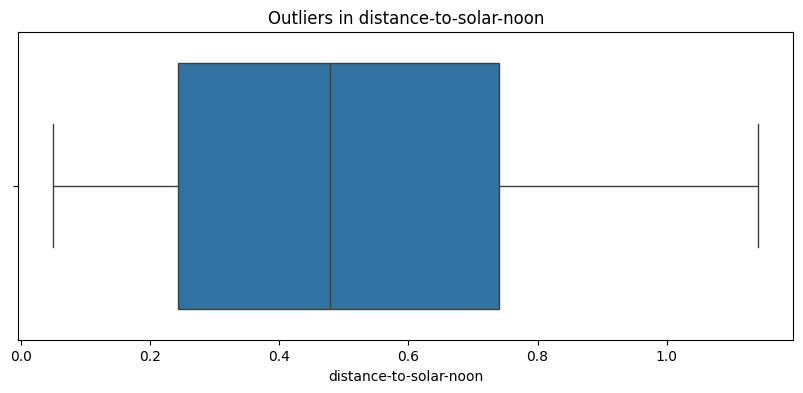

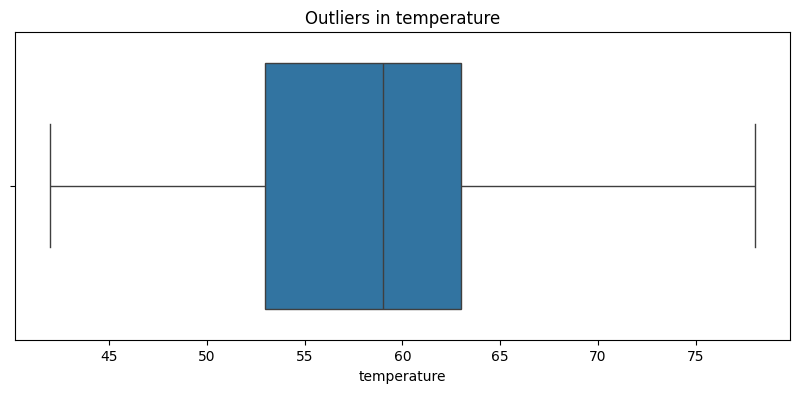

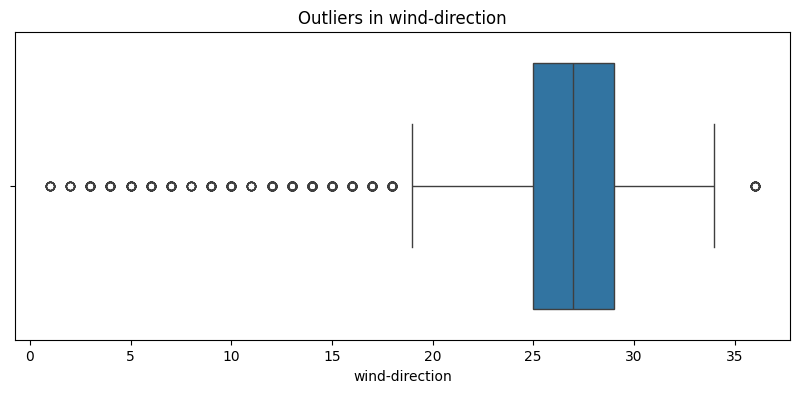

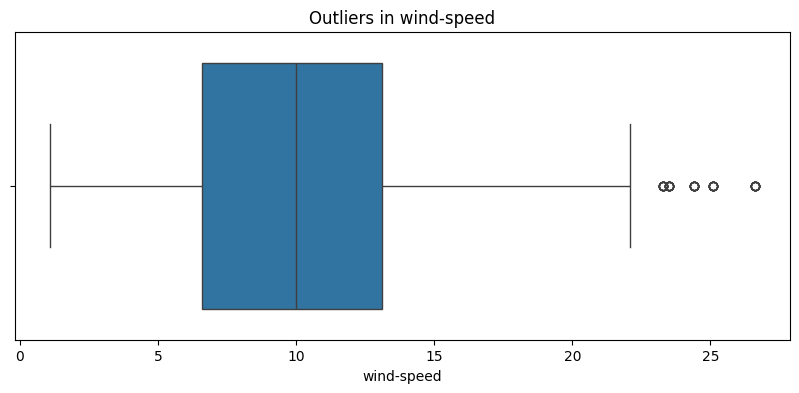

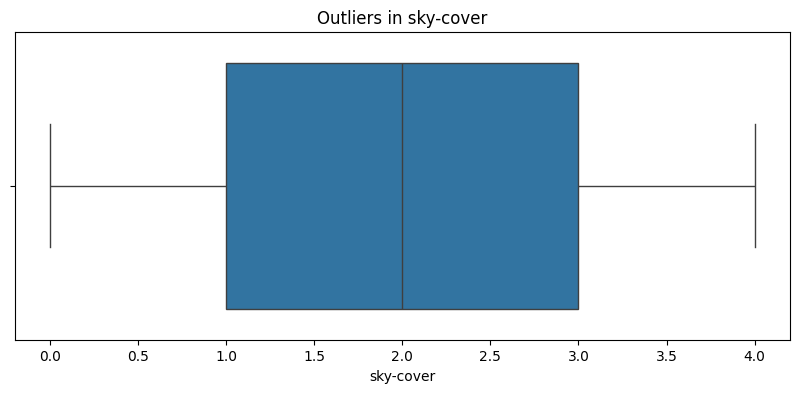

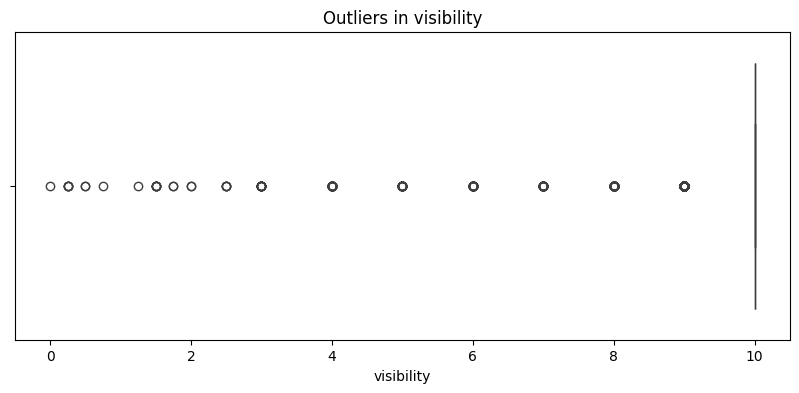

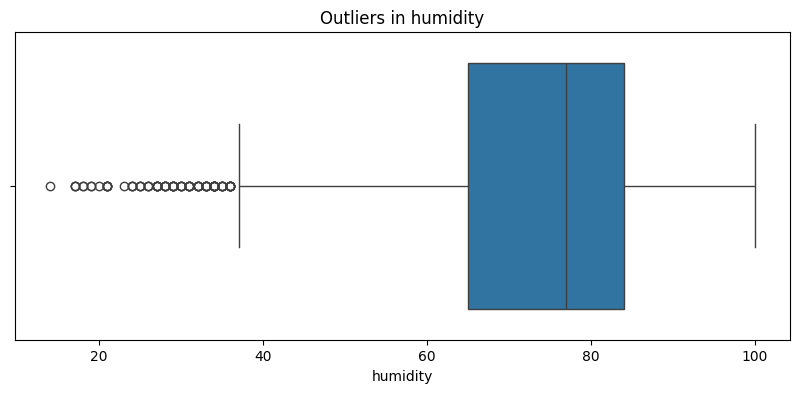

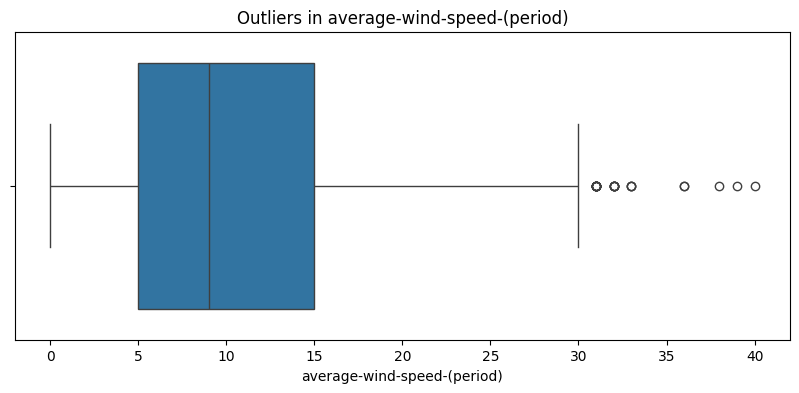

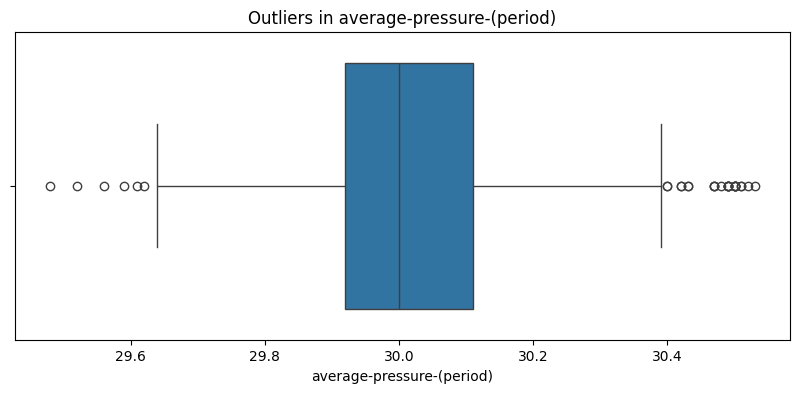

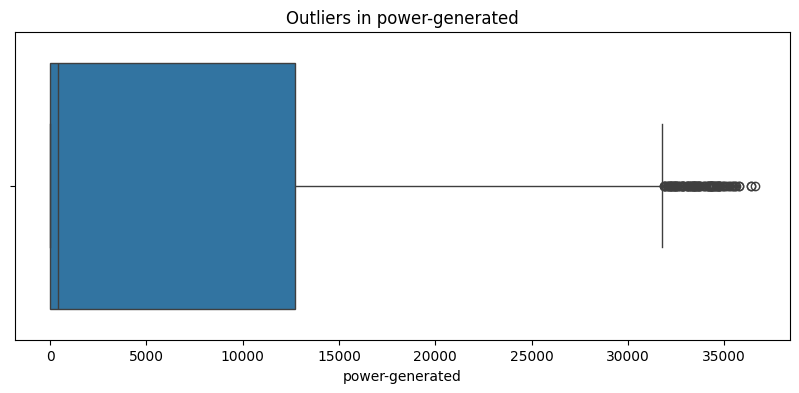

In [23]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Outlier Detection
for col in num_cols:
    plt.figure(figsize=(10,4))
    sns.boxplot(data=df, x=col)
    plt.title(f"Outliers in {col}")
    plt.show()

### 2. Dropping Visibility column

<Axes: xlabel='visibility'>

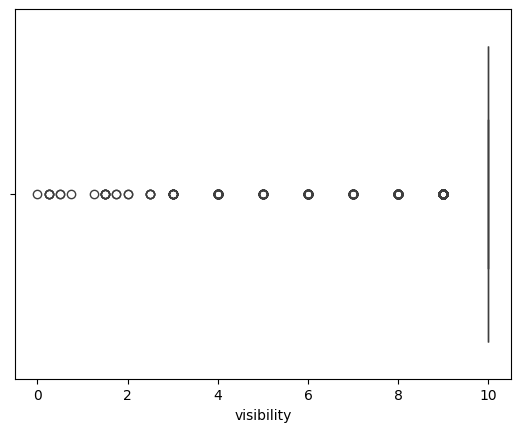

In [24]:
sns.boxplot(data=df, x=df['visibility'])

In [25]:
df['visibility'].value_counts()

visibility
10.00    2491
9.00      169
8.00       73
4.00       43
6.00       42
7.00       36
5.00       29
3.00       14
1.50        6
0.25        4
2.50        4
2.00        2
0.50        2
1.75        2
0.00        1
0.75        1
1.25        1
Name: count, dtype: int64

In [26]:
(2491/2920)*100

85.30821917808218

In [27]:
# dropping "visibility" column of it's less importance and not effecting target column corretion=0.07
df.drop('visibility', axis=1, inplace=True)

In [28]:
df

distance-to-solar-noon  temperature  wind-direction  wind-speed  \
0                   0.859897           69              28         7.5   
1                   0.628535           69              28         7.5   
2                   0.397172           69              28         7.5   
3                   0.165810           69              28         7.5   
4                   0.065553           69              28         7.5   
...                      ...          ...             ...         ...   
2915                0.166453           63              27        13.9   
2916                0.064020           63              27        13.9   
2917                0.294494           63              27        13.9   
2918                0.524968           63              27        13.9   
2919                0.755442           63              27        13.9   

      sky-cover  humidity  average-wind-speed-(period)  \
0             0        75                          8.0   
1             0        77                          5.0   
2             0        70                          0.0   
3             0        33                          0.0   
4             0        21                          3.0   
...         ...       ...                          ...   
2915          4        75                         10.0   
2916          1        66                         15.0   
2917          2        68                         21.0   
2918          2        81                         17.0   
2919          1        81                         11.0   

      average-pressure-(period)  power-generated  
0                         29.82                0  
1                         29.85                0  
2                         29.89             5418  
3                         29.91            25477  
4                         29.89            30069  
...                         ...              ...  
2915                      29.93             6995  
2916                      29.91            29490  
2917                      29.88            17257  
2918                      29.87              677  
2919                      29.90                0  

[2920 rows x 9 columns]

### 3. Outliers Treatment

In [29]:
#Outlier detection function
def outlier_detection(data,colname):
    q1 = data[colname].quantile(0.25)
    q3 = data[colname].quantile(0.75)
    iqr = q3-q1
    
    upper = q3+(1.5*iqr)
    lower = q1-(1.5*iqr)
    
    return lower,upper
    print(lower, upper)

In [30]:
#wind_direction capping

In [31]:
wind_direction_lower, wind_direction_upper = outlier_detection(df, 'wind-direction')

In [32]:
print(wind_direction_lower)
print(wind_direction_upper)

19.0
35.0


In [33]:
df.loc[df['wind-direction']<wind_direction_lower,'wind-direction'] = wind_direction_lower
df.loc[df['wind-direction']>wind_direction_upper,'wind-direction'] = wind_direction_upper

<Axes: xlabel='wind-direction'>

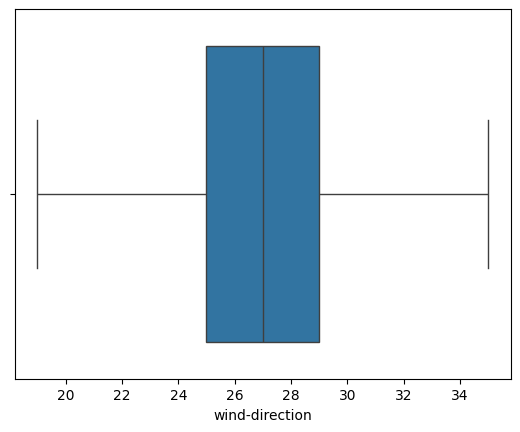

In [34]:
sns.boxplot(x=df["wind-direction"])

In [35]:
# wind_speed capping

In [36]:
wind_speed_lower, wind_speed_upper = outlier_detection(df, 'wind-speed')

In [37]:
print(wind_speed_lower)
print(wind_speed_upper)

-3.1500000000000004
22.85


In [38]:
#Capping Outliers
df.loc[df['wind-speed']<wind_speed_lower,'wind-speed'] = wind_speed_lower
df.loc[df['wind-speed']>wind_speed_upper,'wind-speed'] = wind_speed_upper

<Axes: xlabel='wind-speed'>

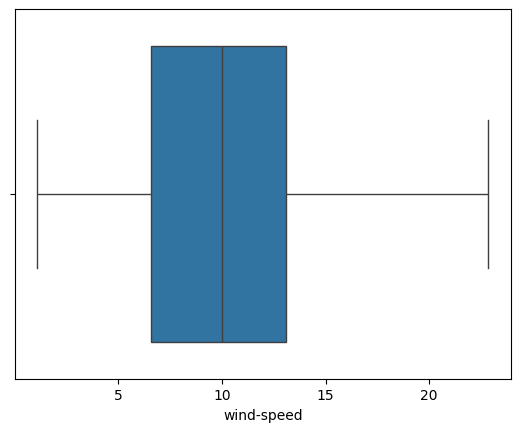

In [39]:
sns.boxplot(x=df["wind-speed"])

In [40]:
#humidity

In [41]:
humidity_lower, humidity_upper = outlier_detection(df, 'humidity')

In [42]:
print(humidity_lower)
print(humidity_upper)

36.5
112.5


In [43]:
#Capping Outliers
df.loc[df['humidity']<humidity_lower,'humidity'] = humidity_lower
df.loc[df['humidity']>humidity_upper,'humidity'] = humidity_upper

C:\Users\DELL\AppData\Local\Temp\ipykernel_11852\1333078402.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '36.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['humidity']<humidity_lower,'humidity'] = humidity_lower


In [44]:
#average-wind-speed-(period)

In [45]:
x4, y4 = outlier_detection(df, 'average-wind-speed-(period)')

In [46]:
#Capping Outliers
df.loc[df['average-wind-speed-(period)']<x4,'average-wind-speed-(period)'] = x4
df.loc[df['average-wind-speed-(period)']>y4,'average-wind-speed-(period)'] = y4

In [47]:
#average-pressure-(period)

In [48]:
x5, y5 = outlier_detection(df, 'average-pressure-(period)')

In [49]:
#Capping Outliers
df.loc[df['average-pressure-(period)']<x5,'average-pressure-(period)'] = x5
df.loc[df['average-pressure-(period)']>y5,'average-pressure-(period)'] = y5

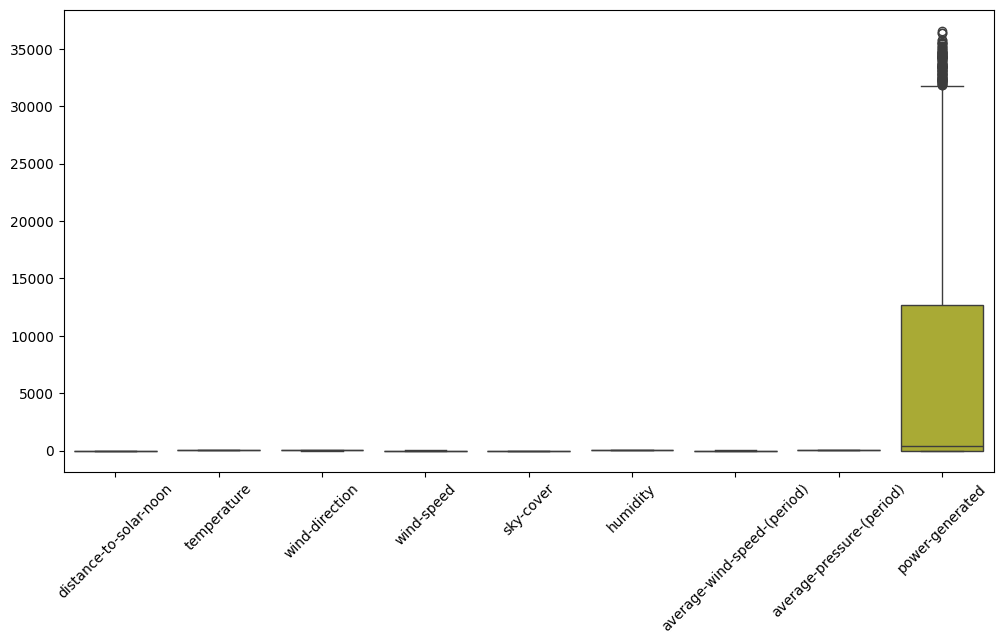

In [50]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

<Axes: >

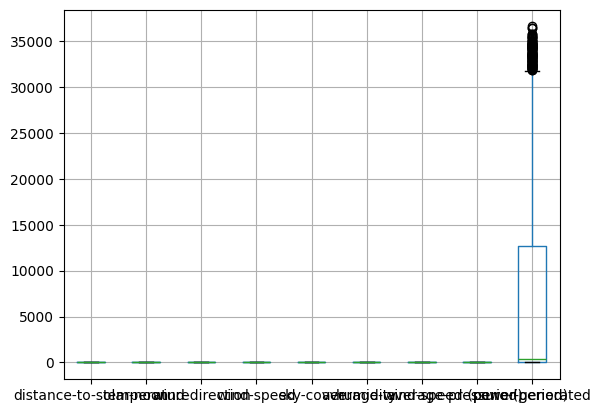

In [51]:
df.boxplot()

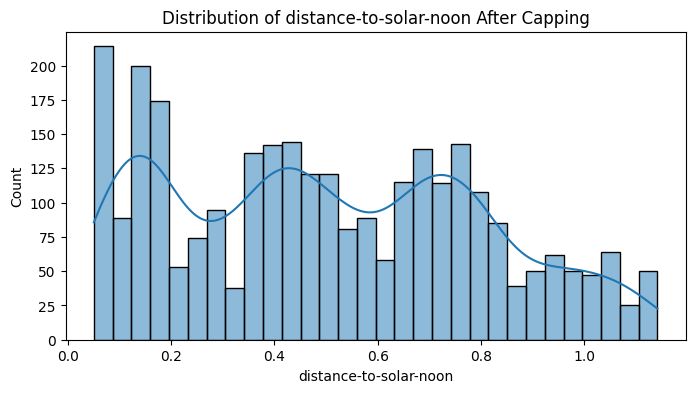

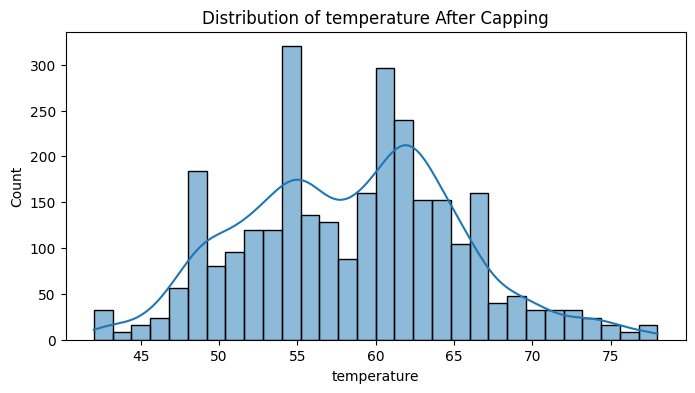

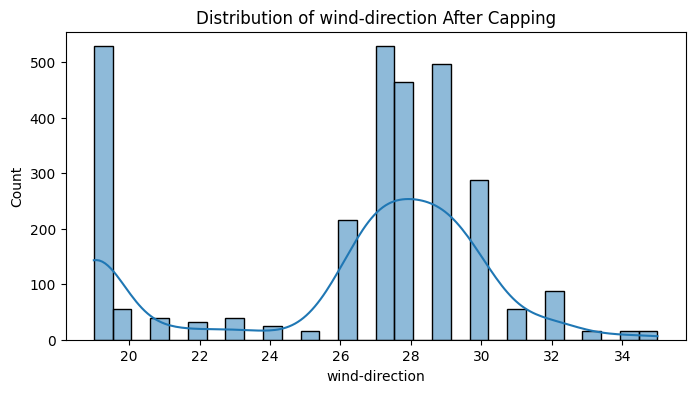

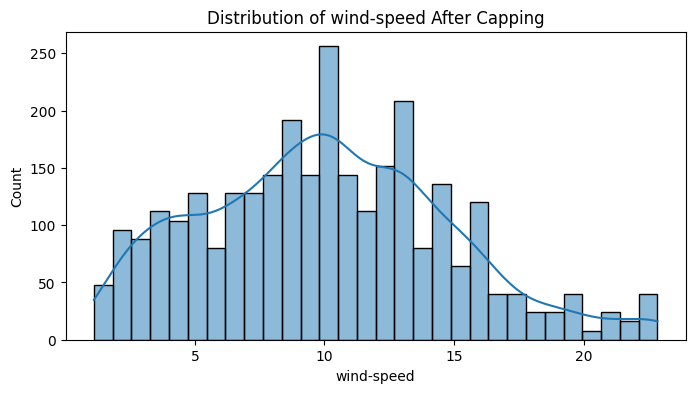

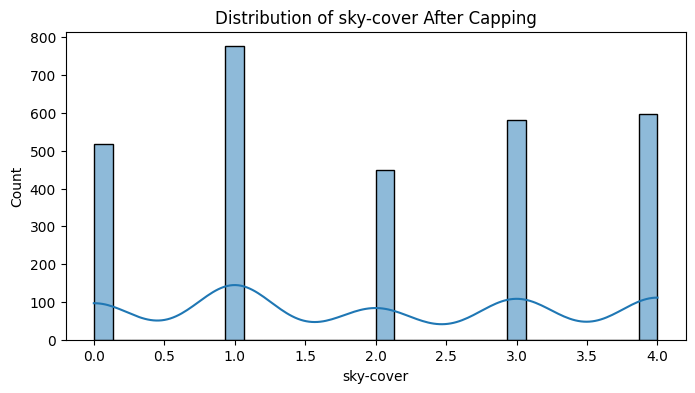

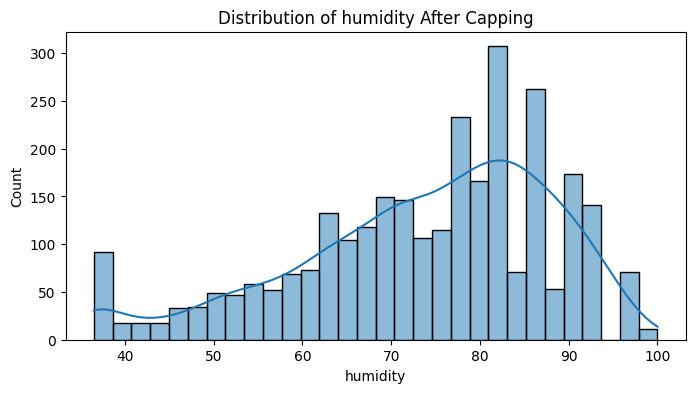

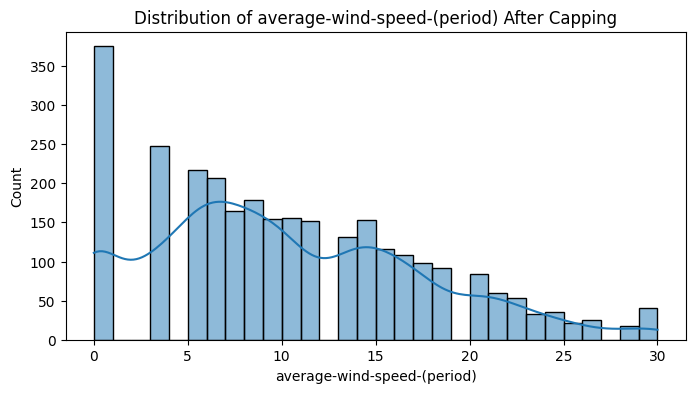

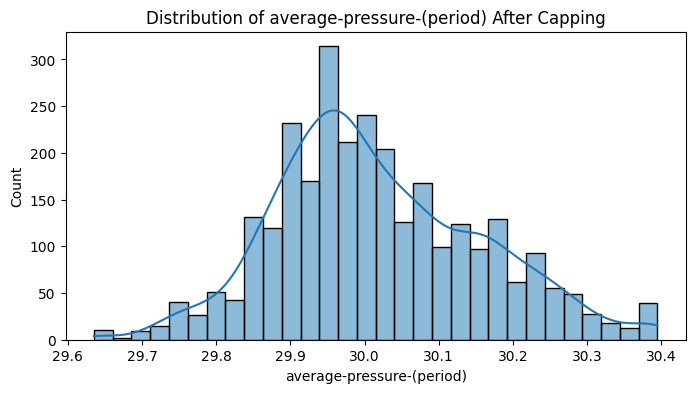

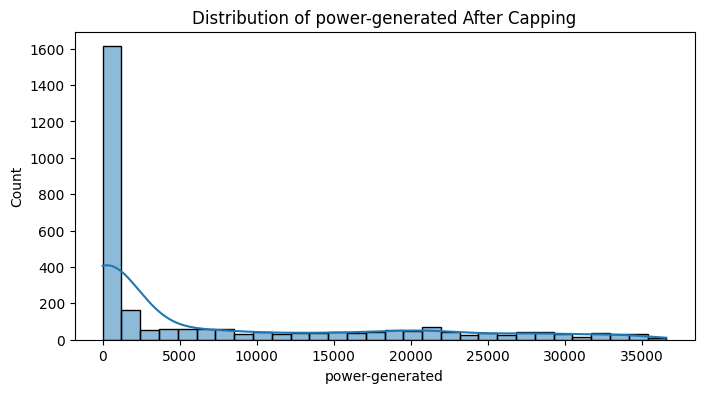

In [52]:
num_cols2 = df.columns
# histograms for capped columns
for col in num_cols2:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col} After Capping')
    plt.show()

In [53]:
df['power-generated'].value_counts()

power-generated
0        1320
3           3
229         3
738         3
114         2
         ... 
12545       1
52          1
8277        1
22482       1
17257       1
Name: count, Length: 1529, dtype: int64

## 4. Handling Zero values present in "power-generated" column

### Linear Regression

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [55]:
# Split dataset
df_nonzero = df[df["power-generated"] != 0].copy()
df_zero = df[df["power-generated"] == 0].copy()

In [56]:
# Features to use
features = ['distance-to-solar-noon', 'temperature', 'wind-direction', 'wind-speed', 'sky-cover', 'humidity', 'average-wind-speed-(period)', 
            'average-pressure-(period)']

In [57]:
features

['distance-to-solar-noon',
 'temperature',
 'wind-direction',
 'wind-speed',
 'sky-cover',
 'humidity',
 'average-wind-speed-(period)',
 'average-pressure-(period)']

In [58]:
# Train-test split on nonzero dataset
X = df_nonzero[features]
y = df_nonzero["power-generated"]

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [61]:
# Train regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [62]:
# Predict for zero dataset
X_zero = df_zero[features]    # X_zero are dataset to predict zero values in "power-generated"
X_zero_scaled = scaler.transform(X_zero)
df_zero["power-generated"] = model.predict(X_zero_scaled)

In [63]:
model.predict(X_zero_scaled)

array([-13877.6459101 ,  -3647.42342867,  -4543.87799284, ...,
       -21443.56518027, -10050.3484972 , -10037.60801665])

In [64]:
df_zero

distance-to-solar-noon  temperature  wind-direction  wind-speed  \
0                   0.859897           69              28         7.5   
1                   0.628535           69              28         7.5   
7                   0.759640           69              28         7.5   
8                   0.862113           72              29         6.8   
9                   0.630155           72              29         6.8   
...                      ...          ...             ...         ...   
2905                0.625798           61              27        15.8   
2911                0.753512           61              27        15.8   
2912                0.857875           63              27        13.9   
2913                0.627401           63              27        13.9   
2919                0.755442           63              27        13.9   

      sky-cover  humidity  average-wind-speed-(period)  \
0             0      75.0                          8.0   
1             0      77.0                          5.0   
7             0      49.0                          6.0   
8             0      67.0                          6.0   
9             0      49.0                          0.0   
...         ...       ...                          ...   
2905          1      90.0                         13.0   
2911          4      90.0                         13.0   
2912          4      93.0                         11.0   
2913          4      90.0                         11.0   
2919          1      81.0                         11.0   

      average-pressure-(period)  power-generated  
0                         29.82    -13877.645910  
1                         29.85     -3647.423429  
7                         29.86     -4543.877993  
8                         29.86    -12609.116444  
9                         29.87       945.478557  
...                         ...              ...  
2905                      29.84     -5084.276904  
2911                      29.87    -15352.778123  
2912                      29.86    -21443.565180  
2913                      29.86    -10050.348497  
2919                      29.90    -10037.608017  

[1320 rows x 9 columns]

In [65]:
# Merge back both datasets
df_cleaned = pd.concat([df_nonzero, df_zero]).sort_index()

In [66]:
df_cleaned

distance-to-solar-noon  temperature  wind-direction  wind-speed  \
0                   0.859897           69              28         7.5   
1                   0.628535           69              28         7.5   
2                   0.397172           69              28         7.5   
3                   0.165810           69              28         7.5   
4                   0.065553           69              28         7.5   
...                      ...          ...             ...         ...   
2915                0.166453           63              27        13.9   
2916                0.064020           63              27        13.9   
2917                0.294494           63              27        13.9   
2918                0.524968           63              27        13.9   
2919                0.755442           63              27        13.9   

      sky-cover  humidity  average-wind-speed-(period)  \
0             0      75.0                          8.0   
1             0      77.0                          5.0   
2             0      70.0                          0.0   
3             0      36.5                          0.0   
4             0      36.5                          3.0   
...         ...       ...                          ...   
2915          4      75.0                         10.0   
2916          1      66.0                         15.0   
2917          2      68.0                         21.0   
2918          2      81.0                         17.0   
2919          1      81.0                         11.0   

      average-pressure-(period)  power-generated  
0                         29.82    -13877.645910  
1                         29.85     -3647.423429  
2                         29.89      5418.000000  
3                         29.91     25477.000000  
4                         29.89     30069.000000  
...                         ...              ...  
2915                      29.93      6995.000000  
2916                      29.91     29490.000000  
2917                      29.88     17257.000000  
2918                      29.87       677.000000  
2919                      29.90    -10037.608017  

[2920 rows x 9 columns]

In [67]:
print(df_cleaned['power-generated'].min())
print(df_cleaned['power-generated'].max())

-38471.75571658448
36580.0


### Random Forest

In [68]:
from sklearn.ensemble import RandomForestRegressor

In [69]:
# Train Random Forest
rf_model = RandomForestRegressor(
    n_estimators=100,      # number of trees
    max_depth=5,         # limit depth to avoid overfitting
    random_state=42,
    n_jobs=-1             # use all CPU cores
)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_jobs=-1, random_state=42)

In [70]:
# Evaluate performance
train_score = rf_model.score(X_train, y_train)
test_score = rf_model.score(X_test, y_test)
print("Train R² Score:", train_score)
print("Test R² Score:", test_score)

Train R² Score: 0.896348757105076
Test R² Score: 0.8780736668999896


In [71]:
X_zero

distance-to-solar-noon  temperature  wind-direction  wind-speed  \
0                   0.859897           69              28         7.5   
1                   0.628535           69              28         7.5   
7                   0.759640           69              28         7.5   
8                   0.862113           72              29         6.8   
9                   0.630155           72              29         6.8   
...                      ...          ...             ...         ...   
2905                0.625798           61              27        15.8   
2911                0.753512           61              27        15.8   
2912                0.857875           63              27        13.9   
2913                0.627401           63              27        13.9   
2919                0.755442           63              27        13.9   

      sky-cover  humidity  average-wind-speed-(period)  \
0             0      75.0                          8.0   
1             0      77.0                          5.0   
7             0      49.0                          6.0   
8             0      67.0                          6.0   
9             0      49.0                          0.0   
...         ...       ...                          ...   
2905          1      90.0                         13.0   
2911          4      90.0                         13.0   
2912          4      93.0                         11.0   
2913          4      90.0                         11.0   
2919          1      81.0                         11.0   

      average-pressure-(period)  
0                         29.82  
1                         29.85  
7                         29.86  
8                         29.86  
9                         29.87  
...                         ...  
2905                      29.84  
2911                      29.87  
2912                      29.86  
2913                      29.86  
2919                      29.90  

[1320 rows x 8 columns]

In [72]:
# Predict for zero dataset
df_zero["power-generated"] = rf_model.predict(X_zero)

In [73]:
# Step 7: Merge back datasets
df_cleaned2 = pd.concat([df_nonzero, df_zero]).sort_index()

In [74]:
df_cleaned2

distance-to-solar-noon  temperature  wind-direction  wind-speed  \
0                   0.859897           69              28         7.5   
1                   0.628535           69              28         7.5   
2                   0.397172           69              28         7.5   
3                   0.165810           69              28         7.5   
4                   0.065553           69              28         7.5   
...                      ...          ...             ...         ...   
2915                0.166453           63              27        13.9   
2916                0.064020           63              27        13.9   
2917                0.294494           63              27        13.9   
2918                0.524968           63              27        13.9   
2919                0.755442           63              27        13.9   

      sky-cover  humidity  average-wind-speed-(period)  \
0             0      75.0                          8.0   
1             0      77.0                          5.0   
2             0      70.0                          0.0   
3             0      36.5                          0.0   
4             0      36.5                          3.0   
...         ...       ...                          ...   
2915          4      75.0                         10.0   
2916          1      66.0                         15.0   
2917          2      68.0                         21.0   
2918          2      81.0                         17.0   
2919          1      81.0                         11.0   

      average-pressure-(period)  power-generated  
0                         29.82       604.357357  
1                         29.85       606.425363  
2                         29.89      5418.000000  
3                         29.91     25477.000000  
4                         29.89     30069.000000  
...                         ...              ...  
2915                      29.93      6995.000000  
2916                      29.91     29490.000000  
2917                      29.88     17257.000000  
2918                      29.87       677.000000  
2919                      29.90       602.340684  

[2920 rows x 9 columns]

In [75]:
print(df_cleaned2['power-generated'].min())
print(df_cleaned2['power-generated'].max())

1.0
36580.0


In [76]:
df_cleaned2['power-generated'].nunique()

2665

In [77]:
df['power-generated'].nunique()

1529

# 5. Main Model Building                                                                                                                        

In [78]:
from sklearn.preprocessing import StandardScaler

In [79]:
#differtiating independent and target features
X2 = df_cleaned2[features]
y2 = df_cleaned2["power-generated"]

# Train-test split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [80]:
#scaling
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train2)  # fit and transform on training data
X_test_scaled = scaler.transform(X_test2)        # applies same scaling on testing data

### Linear regression

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [82]:
# Train the model 
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train2)

LinearRegression()

In [83]:
# Predictions 
y_pred_lr = lr_model.predict(X_test_scaled)

In [84]:
y_pred_lr

array([ 1.72043329e+04,  1.03010546e+04,  5.58534390e+03,  7.91398242e+03,
        7.81755996e+03,  2.13933894e+04,  6.44403711e+02, -2.43014058e+03,
        2.87931744e+03,  3.17876099e+03,  7.11711238e+03, -9.53186023e+02,
        1.84260447e+04,  1.97437684e+04,  1.12192339e+04, -8.39806938e+03,
       -9.00106664e+03,  7.57126647e+03,  7.85693120e+03,  6.37890708e+03,
        1.55756916e+04, -8.83728383e+03,  1.31029863e+04,  5.60847009e+03,
        1.50790358e+04,  4.33935227e+03,  1.78004411e+04,  3.50807451e+03,
        1.83256088e+04,  1.88989294e+04,  1.81525649e+04,  2.36770931e+04,
        1.42303866e+04,  3.08057494e+03, -5.52135378e+02,  1.42317313e+04,
       -1.02833200e+03,  1.07153571e+04,  2.44098183e+04, -6.41896791e+03,
        1.32898642e+04,  9.52728654e+02,  1.76290425e+04, -2.96259500e+02,
        8.14522671e+03,  1.48929632e+04,  1.11762514e+04,  2.06983722e+04,
        1.50403871e+04, -9.74821128e+02,  3.47048268e+03,  1.56528677e+04,
        1.66762234e+04, -

In [85]:
# Evaluation Metrics 
print("Linear Regression results:")
print(mean_absolute_error(y_test2, y_pred_lr))
print(r2_score(y_test2, y_pred_lr))

Linear Regression results:
4725.381465127113
0.6756717349166368


In [86]:
print(lr_model.score(X_train_scaled, y_train2)) 
print(lr_model.score(X_test_scaled, y_test2))

0.6633650004772054
0.6756717349166368


### Ridge and Lasso

In [87]:
from sklearn.linear_model import Ridge

# Train Ridge Model 
ridge_model = Ridge(alpha=1.0)  # you can tune alpha
ridge_model.fit(X_train_scaled, y_train2)

# Predictions 
y_pred_ridge = ridge_model.predict(X_test_scaled)

In [88]:
y_pred_ridge

array([ 1.72020867e+04,  1.03008386e+04,  5.58647813e+03,  7.91255691e+03,
        7.81617094e+03,  2.13903813e+04,  6.46021765e+02, -2.42808710e+03,
        2.88147222e+03,  3.17930657e+03,  7.11606715e+03, -9.49557633e+02,
        1.84248899e+04,  1.97407744e+04,  1.12173806e+04, -8.39201773e+03,
       -8.99546059e+03,  7.56902176e+03,  7.85695901e+03,  6.37907493e+03,
        1.55729088e+04, -8.83106447e+03,  1.31015159e+04,  5.60788121e+03,
        1.50765454e+04,  4.34001167e+03,  1.77993482e+04,  3.50873334e+03,
        1.83260986e+04,  1.88965342e+04,  1.81507489e+04,  2.36728084e+04,
        1.42266931e+04,  3.07977272e+03, -5.49015593e+02,  1.42283892e+04,
       -1.02665476e+03,  1.07140548e+04,  2.44044221e+04, -6.41448799e+03,
        1.32904594e+04,  9.56445077e+02,  1.76263457e+04, -2.93449669e+02,
        8.14443486e+03,  1.48895830e+04,  1.11749975e+04,  2.06912236e+04,
        1.50370000e+04, -9.73131643e+02,  3.47128002e+03,  1.56498846e+04,
        1.66726634e+04, -

In [89]:
# Evaluation 
print("Ridge Regression results:")
print(mean_absolute_error(y_test2, y_pred_ridge))
print(r2_score(y_test2, y_pred_ridge))

Ridge Regression results:
4725.142271136924
0.6756602306939385


### Random Forest Regressor

### As I build different models on df_cleaned2 and decided to go with "Random Forest Regressor", therefore using pipeline for deployment purpose

In [90]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor

# Define pipeline: missing value handling + model
rf_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),   # fills missing values
    ('model', RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1))
])

# Fit pipeline
rf_pipeline.fit(X_train2, y_train2)

Pipeline(steps=[('imputer', SimpleImputer()),
                ('model',
                 RandomForestRegressor(max_depth=10, n_jobs=-1,
                                       random_state=42))])

In [91]:
# Predict
y_pred_rf = rf_pipeline.predict(X_test2)

In [92]:
y_pred_rf

array([21169.04560107,  1872.50506714,   454.68805558,  5671.43143341,
        2291.5365583 , 25920.61723282,   538.21322883,   517.38049971,
         549.96933805,   541.90015558,  2420.62281386,   541.97539554,
       19731.99688144, 17605.5215031 ,  6360.94666   ,   528.87589801,
         557.95613673,  1024.43753874,  2109.21556318,  2493.97284692,
       18957.75427531,   528.87589801, 12173.79873981,  1413.71497785,
       15599.57650221,   925.26456557,  4777.21460269,   484.4693939 ,
       18068.35145117, 20524.17738534, 19559.13552089, 33833.99238795,
       20974.47794343,   940.82051877,   524.00234408, 13873.55438136,
         520.91696558,  5878.73622561, 28035.35715842,   589.88210001,
        2206.23288006,  1317.42768521, 14115.95829648,   564.89018552,
        2531.30752908, 23538.06008197,  6807.28210792, 17405.54899795,
       21072.00611962,   539.7385695 ,   538.01995797, 21778.27071316,
       19500.32809525,   526.86778623,  1839.38736881,   707.28948025,
      

In [93]:
print("\nRandom Forest Pipeline Performance on Test Set:")
print(mean_absolute_error(y_test2, y_pred_rf))
print(r2_score(y_test2, y_pred_rf))


Random Forest Pipeline Performance on Test Set:
1294.8072328042558
0.941496865684714


In [94]:
print(rf_pipeline.score(X_train2, y_train2)) 
print(rf_pipeline.score(X_test2, y_test2))

0.9818270090439994
0.941496865684714


In [95]:
import joblib

joblib.dump(rf_pipeline, "solarPanel_pipeline.pkl")
print("Pipeline saved as solarPanel_pipeline.pkl")

Pipeline saved as solarPanel_pipeline.pkl


In [96]:
df_cleaned2.columns

Index(['distance-to-solar-noon', 'temperature', 'wind-direction', 'wind-speed',
       'sky-cover', 'humidity', 'average-wind-speed-(period)',
       'average-pressure-(period)', 'power-generated'],
      dtype='object')

### These below model was first build to compare with other models

In [97]:
# Initialize Random Forest
#rf_model = RandomForestRegressor(
 #   n_estimators=100,       # number of trees
  #  max_depth=10,          # limit depth to prevent overfitting
   # random_state=42,
    #n_jobs=-1              # use all CPU cores
#)

In [98]:
# Train
#rf_model.fit(X_train2, y_train2)

In [99]:
# Predict
#y_pred_rf = rf_model.predict(X_test2)

In [100]:
#y_pred_rf

In [101]:
# Evaluation
#print(mean_absolute_error(y_test2, y_pred_rf))
#print(np.sqrt(mean_squared_error(y_test2, y_pred_rf)))
#print(r2_score(y_test2, y_pred_rf))

In [102]:
#print(rf_model.score(X_train2, y_train2)) 
#print(rf_model.score(X_test2, y_test2))

### XGBoost

In [103]:
from xgboost import XGBRegressor

In [104]:
# Initialize XGBoost Regressor
xgb_model = XGBRegressor(
    n_estimators=500,      # number of boosting rounds
    learning_rate=0.05,    # step size shrinkage
    max_depth=6,           # max depth of trees
    subsample=0.8,         # row sampling
    colsample_bytree=0.8,  # feature sampling
    random_state=42
)

In [105]:
# Train model
xgb_model.fit(X_train2, y_train2)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [106]:
# Predictions
y_pred_xgb = xgb_model.predict(X_test2)

In [107]:
y_pred_xgb

array([ 2.15311055e+04,  1.91130249e+03,  4.54290314e+02,  3.66677979e+03,
        2.25891528e+03,  2.67117129e+04,  5.81402832e+02,  4.93552155e+02,
        5.30905029e+02,  1.10105261e+03,  2.22064233e+03,  4.21371460e+02,
        1.89044863e+04,  1.88329414e+04,  7.61911475e+03,  5.71645386e+02,
        1.21700854e+03,  5.39743774e+02,  2.43139258e+03,  2.17849463e+03,
        1.86265762e+04,  4.31722229e+02,  1.03738076e+04,  1.32638928e+03,
        1.69337344e+04,  9.82761658e+02,  5.50354590e+03,  5.57266113e+02,
        1.58410137e+04,  1.76443438e+04,  2.01733125e+04,  3.52599219e+04,
        2.15348184e+04,  1.60697803e+03,  6.31066772e+02,  1.34583770e+04,
        5.67965393e+02,  4.98339648e+03,  2.61313340e+04,  5.02692657e+02,
        3.04958203e+03,  2.32045197e+02,  1.26669912e+04,  5.07609100e+02,
        1.93371899e+03,  2.32269512e+04,  8.49980664e+03,  1.72133789e+04,
        2.04998438e+04,  5.36967590e+02,  1.18361072e+03,  2.12505684e+04,
        2.03746602e+04,  

In [108]:
print("XGBoost Regressor Performance:")
print(mean_absolute_error(y_test2, y_pred_xgb))
print(r2_score(y_test2, y_pred_xgb))

XGBoost Regressor Performance:
1367.849125598915
0.9480915888996124


In [109]:
print(rf_model.score(X_train2, y_train2)) 
print(rf_model.score(X_test2, y_test2))

0.9294873007609296
0.9354914031557934


In [110]:
#Hyperparameter tuning

In [111]:
from sklearn.model_selection import GridSearchCV

In [112]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1]
}

In [113]:
# Initialize model
xgb = XGBRegressor(subsample=0.8, colsample_bytree=0.8, random_state=42)

In [114]:
# GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=3,                # 3-fold cross-validation
    scoring='r2',        # use R² score
    verbose=2,
    n_jobs=-1
)

In [115]:
# Fit on training data
grid_search.fit(X_train2, y_train2)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None, colsample_bytree=0.8,
                                    device=None, early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, ma...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300, 500]},
             scoring='r2', verbose=2)

In [116]:
# Best parameters & score
print("Best Parameters:", grid_search.best_params_)
print("Best CV Score (R²):", grid_search.best_score_)

Best Parameters: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 300}
Best CV Score (R²): 0.9329713373066282


## Plotting the result of each models

C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


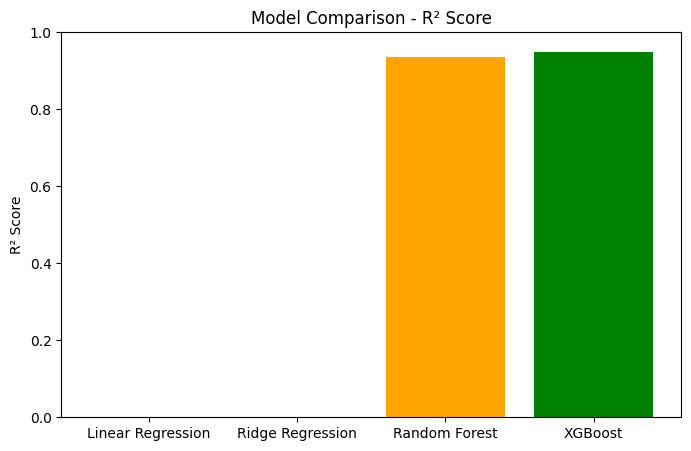

In [117]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Predictions
models = {
    "Linear Regression": lr_model,
    "Ridge Regression": ridge_model,
    "Random Forest": rf_model,
    "XGBoost": xgb_model
}

r2_scores = {}

for name, model in models.items():
    y_pred = model.predict(X_test2)
    r2_scores[name] = r2_score(y_test2, y_pred)

# Bar plot
plt.figure(figsize=(8,5))
plt.bar(r2_scores.keys(), r2_scores.values(), color=['blue','red','orange','green'])
plt.ylabel("R² Score")
plt.title("Model Comparison - R² Score")
plt.ylim(0,1)
plt.show()


C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


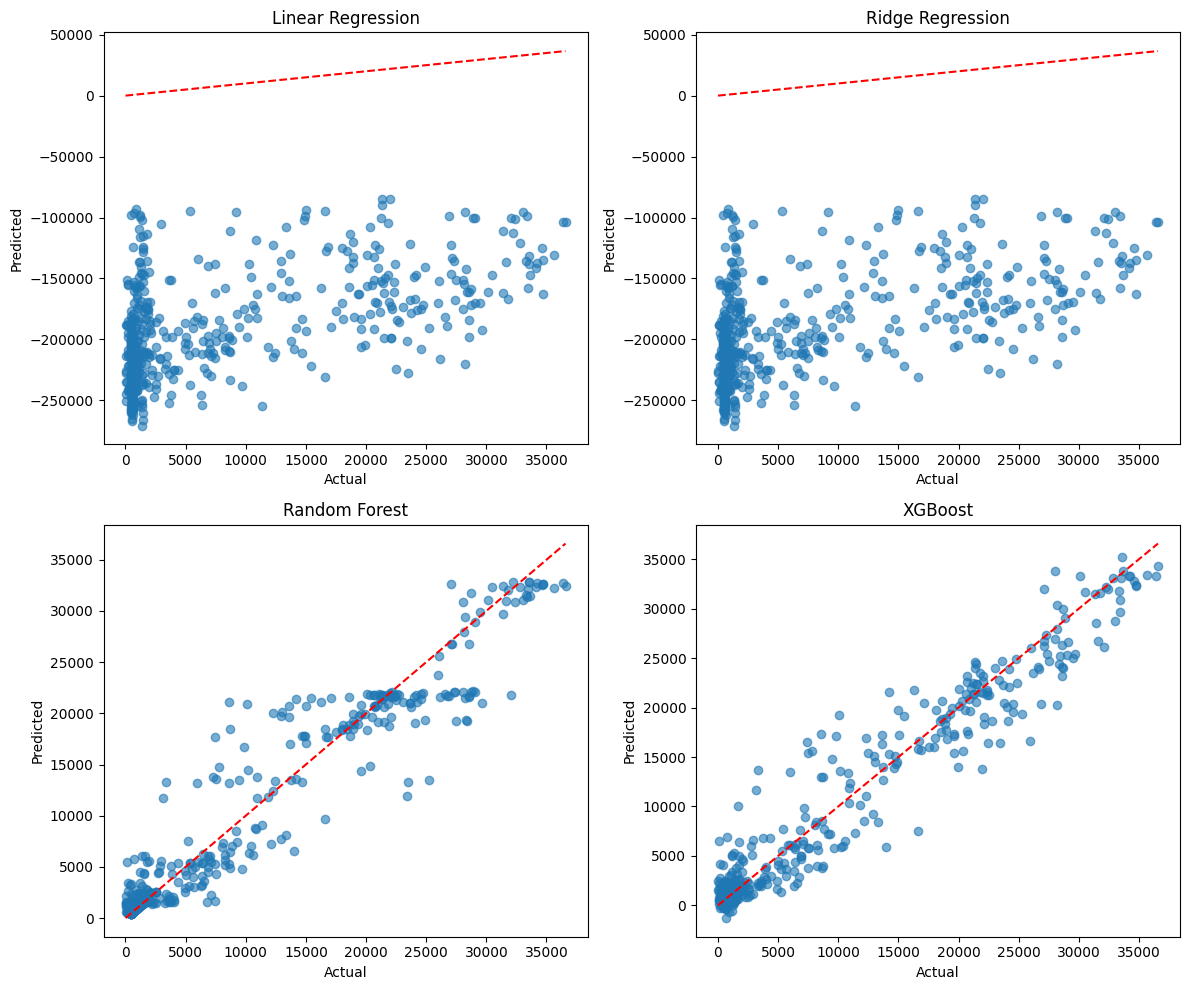

In [118]:
plt.figure(figsize=(12,10))

for i, (name, model) in enumerate(models.items(), 1):
    y_pred = model.predict(X_test2)
    plt.subplot(2,2,i)
    plt.scatter(y_test2, y_pred, alpha=0.6)
    plt.plot([y_test2.min(), y_test2.max()], [y_test2.min(), y_test2.max()], 'r--')  # perfect line
    plt.title(f"{name}")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")

plt.tight_layout()
plt.show()


C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


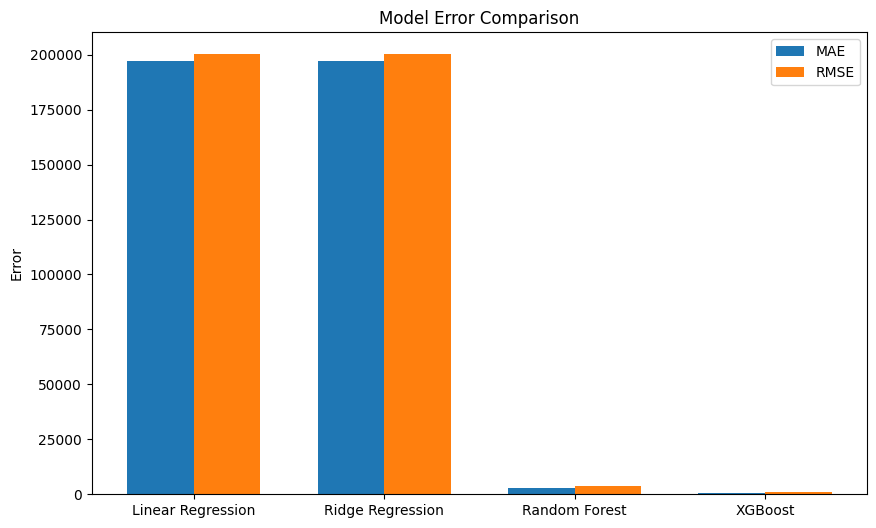

In [119]:
mae_scores = {}
rmse_scores = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    mae_scores[name] = mean_absolute_error(y_test, y_pred)
    rmse_scores[name] = np.sqrt(mean_squared_error(y_test, y_pred))

# Plot MAE and RMSE
x = np.arange(len(models))
width = 0.35

plt.figure(figsize=(10,6))
plt.bar(x - width/2, mae_scores.values(), width, label="MAE")
plt.bar(x + width/2, rmse_scores.values(), width, label="RMSE")

plt.xticks(x, models.keys())
plt.ylabel("Error")
plt.title("Model Error Comparison")
plt.legend()
plt.show()